In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 50_Startups

In [27]:
df=pd.read_csv("C:\\Users\\sonih\\Downloads\\50_Startups.csv")

In [28]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [29]:
import seaborn as sbn

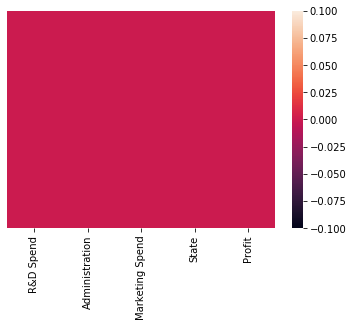

In [6]:
sbn.heatmap(df.isnull(),yticklabels=False)

In [30]:
State=pd.get_dummies(df['State'],drop_first=True)

In [31]:
df=pd.concat([df,State],axis=1)

In [33]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [34]:
df=df.drop('State',axis=1)

In [35]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [42]:
y=df.iloc[:,3]
X=df.drop('Profit',axis=1)

In [39]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [45]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=False)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
SLR=LinearRegression()

In [50]:
SLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_predict=SLR.predict(X_test)

In [52]:
from sklearn.metrics import r2_score

In [53]:
score=r2_score(y_test,y_predict)
score

0.9358680970046241